# Klasifikacija korišćenjem stabla odlučivanja

In [1]:
# Ucitavanje vec pretprocesiranih podataka
import pandas as pd
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Treniranje
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
# Predikcija
y_dtc = dtc.predict(X_test)

In [4]:
# Metrike
from helpers import report

report(y_test, y_dtc)

Tačnost: 0.6258278145695364
Izvestaj:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       360
           1       0.54      0.54      0.54       244

    accuracy                           0.63       604
   macro avg       0.61      0.61      0.61       604
weighted avg       0.63      0.63      0.63       604

Matrica konfuzije:
     0    1
0  247  113
1  113  131


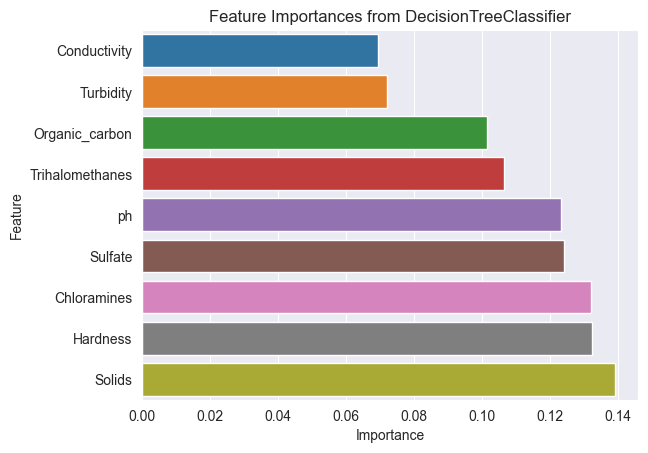

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dtc.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure()
sns.barplot(data=feature_importances, y='Feature', x='Importance')
plt.title('Feature Importances from DecisionTreeClassifier')
plt.show()

In [6]:
# Optimizacija hiperparametara
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8],
    'random_state': [42]
}

gscv = GridSearchCV(
    dtc,
    param_grid,
    cv=3,
)

gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8],
                         'random_state': [42]})

In [7]:
import pprint
print(f"Najbolji parametri:")
pprint.pprint(gscv.best_params_)
print(f"Najbolja tačnost: {gscv.best_score_}")

Najbolji parametri:
{'criterion': 'gini', 'max_depth': 8, 'random_state': 42}
Najbolja tačnost: 0.6325515280739161


In [8]:
# Slucajne sume
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, np.ravel(y_train))

y_rf = rf.predict(X_test)

report(y_test, y_rf)

Tačnost: 0.6854304635761589
Izvestaj:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       360
           1       0.68      0.42      0.52       244

    accuracy                           0.69       604
   macro avg       0.68      0.64      0.64       604
weighted avg       0.68      0.69      0.67       604

Matrica konfuzije:
     0    1
0  312   48
1  142  102


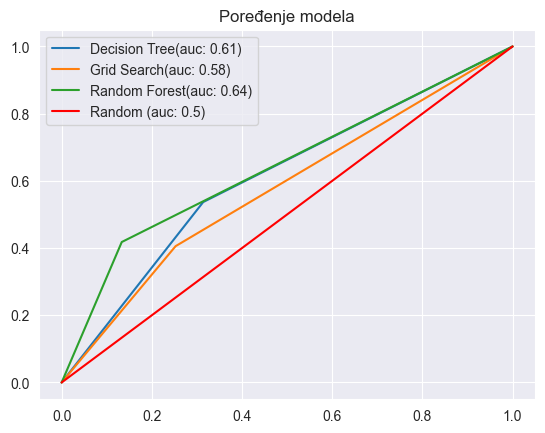

In [9]:
from helpers import print_roc_curve

models = {
    'Decision Tree': dtc,
    'Grid Search': gscv.best_estimator_,
    'Random Forest': rf,
}

print_roc_curve(models, X_test, y_test)

In [10]:
from helpers import save_model

save_model(dtc, '../../models/dtc.pkl')
save_model(gscv, '../../models/gscv.pkl')
save_model(rf, '../../models/rf.pkl')